<center><h1>Explore Vaccines Tweets - Labelled data
   </h1></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [71]:
#! pip install tensorflow==2.6  seaborn  lightgbm   pandas plotly  matplotlib nltk numpy gensim wordcloud textblob neattext scikit_learn nbformat

In [72]:
import tensorflow as tf
tf.__version__



'2.4.0'

In [73]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
##
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
##
import warnings
warnings.simplefilter("ignore")

## Load data

In [74]:
tweets_df = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv", encoding='latin1')

# Data exploration


## Glimpse the data

In [75]:
print(f"data shape: {tweets_df.shape}")

data shape: (6000, 3)


In [76]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6000 non-null   float64
 1   label       6000 non-null   int64  
 2   tweet_text  6000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 140.8+ KB


In [77]:
tweets_df.describe()

,tweet_id,label
count,6.000000e+03,6000.000000
mean,1.372192e+18,2.246667
std,1.036489e+16,0.570856
min,1.337736e+18,1.000000
25%,1.366304e+18,2.000000
50%,1.373906e+18,2.000000
75%,1.380625e+18,3.000000
max,1.385237e+18,3.000000


In [78]:
tweets_df.head()

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."


### Missing data

In [79]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [80]:
missing_data(tweets_df)

,tweet_id,label,tweet_text
Total,0,0,0
Percent,0,0,0
Types,float64,int64,object


In [81]:
missed = pd.DataFrame()
missed['column'] = tweets_df.columns
missed['percent'] = [round(100* tweets_df[col].isnull().sum() / len(tweets_df), 2) for col in tweets_df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]
print(missed)
#fig = sns.barplot(
#    x=missed['percent'], 
#    y=missed["column"], 
#    orientation='horizontal'
#).set_title('Missed values percent for every column')

Empty DataFrame
Columns: [column, percent]
Index: []


### Unique values

In [82]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [83]:
unique_values(tweets_df)

,tweet_id,label,tweet_text
Total,6000,6000,6000
Uniques,6000,3,5991


### Most frequent values

In [84]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [85]:
most_frequent_values(tweets_df)

,tweet_id,label,tweet_text
Total,6000,6000,6000
Most frequent item,1.37412e+18,2,"Selling: #NitrileGloves, #1860 #FaceMasks, #Vaccines #SputnikV, #syringes. Contact sales: https:..."
Frequence,1,3680,4
Percent from total,0.017,61.333,0.067


## Visualize the data distribution

### Tweet source

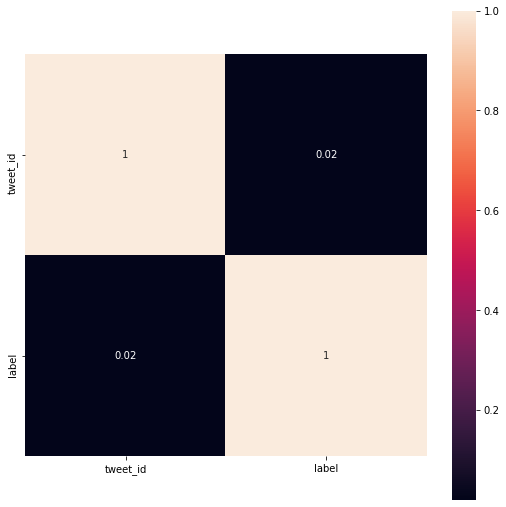

In [86]:
#plot heatmap to see the correlation between features
plt.subplots(figsize=(9, 9))
sns.heatmap(tweets_df.corr(), annot=True, square=True)
plt.show()

In [87]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [88]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Text wordcloauds

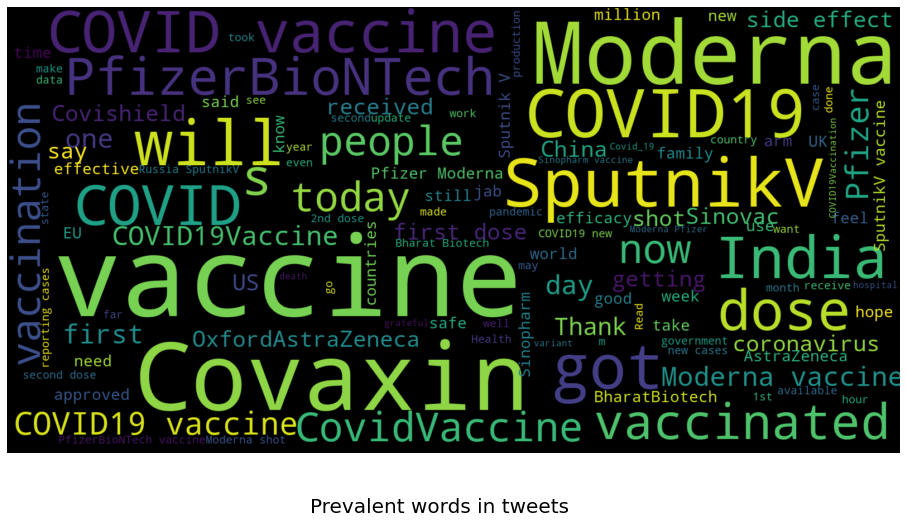

In [89]:
show_wordcloud(tweets_df['tweet_text'], title = 'Prevalent words in tweets')

In [90]:
#@labels=tweets_df.groupby("label").agg({'tweet_text':'count'}).rename(columns={'tweet_text':'tweet_count'}).sort_values(by="tweet_count", ascending=False)


labels = tweets_df.groupby('label').count()['tweet_text'].reset_index().sort_values(by='label',ascending=True)
labels.style.background_gradient(cmap='gist_earth_r')

,label,tweet_text
0,1,420
1,2,3680
2,3,1900


<AxesSubplot:xlabel='label', ylabel='count'>

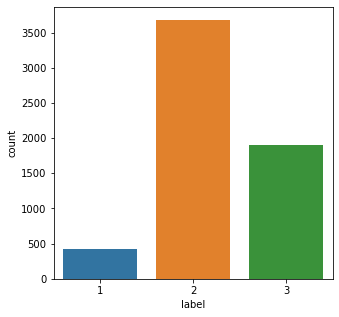

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=tweets_df)



In [92]:
fig = go.Figure(go.Funnelarea( text =labels.label,
    values = labels.tweet_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [93]:
tweets_df

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."
...,...,...,...
5995,1.370975e+18,2,"@Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not..."
5996,1.379827e+18,3,So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...
5997,1.384789e+18,2,Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...
5998,1.382355e+18,1,@___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...


In [94]:
tweets_df.drop('tweet_id',inplace=True,axis=1)

In [95]:
tweets_df

,label,tweet_text
0,1,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,2,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,2,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,1,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."
...,...,...
5995,2,"@Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not..."
5996,3,So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...
5997,2,Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...
5998,1,@___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...


## Data  processing

In [96]:
import neattext as ntx
tweets_df['clean_data']=tweets_df['tweet_text']
# Cleaning the data using neattext library
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_hashtags)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_urls)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_userhandles)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_multiple_spaces)
#tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_special_characters)#
tweets_df['clean_data']=tweets_df['clean_data'].str.replace("[^a-zA-Z#]", " ")
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_numbers)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_puncts)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_emojis)
tweets_df['clean_data']=tweets_df['clean_data'].str.lower()
tweets_df[['clean_data','tweet_text']].head()


,clean_data,tweet_text
0,a day dying from the so called covid vaccine reports,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,pranam message for today manifested in dhyan by,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,hyderabad based has sought funds from the government to ramp up production of its indigenously...,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,confirmation that chinese don t have very high protection rates according to the director of ...,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,lab studies suggest vaccines can protect against,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."


In [97]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
remove_words=lambda x : ' '.join([word for word in x.split() if word not in stopwords.words('english')])
tweets_df['clean_data']=tweets_df['clean_data'].apply(remove_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rkr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
pd.set_option('display.max_colwidth', 100)
tweets_df[['clean_data','tweet_text']]

,clean_data,tweet_text
0,day dying called covid vaccine reports,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,pranam message today manifested dhyan,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,hyderabad based sought funds government ramp production indigenously developed covid vaccine com...,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,confirmation chinese high protection rates according director china centers disease control gao ...,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,lab studies suggest vaccines protect,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."
...,...,...
5995,dr jee many people like get covaxin vaccination done available places people putting covishield ...,"@Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not..."
5996,happy fully vaccinated covid ready serve manila philippines,So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...
5997,serum institute india announces cost covishield vaccine vaccine cost rs govt hospitals amp rs pr...,Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...
5998,mine yesterday able get bed today feel,@___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...


In [99]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

def tokenize(tweet_text):
    tokenizer = TweetTokenizer()
    tweet_tokens = tokenizer.tokenize(tweet_text)
    tweets_clean = []
    stemmer = PorterStemmer()
    for word in tweet_tokens:
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return ' '.join(tweets_clean)
    


In [100]:
tweets_df['clean_data']=tweets_df['clean_data'].apply(tokenize)
pd.set_option('display.max_colwidth', 100)
tweets_df[['clean_data','tweet_text']]

,clean_data,tweet_text
0,day die call covid vaccin report,"4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac..."
1,pranam messag today manifest dhyan,Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...
2,hyderabad base sought fund govern ramp product indigen develop covid vaccin compani written seek...,Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...
3,confirm chines high protect rate accord director china center diseas control gao fu effect found...,"Confirmation that Chinese #vaccines ""dont have very high protection rates"", according to the di..."
4,lab studi suggest vaccin protect,"Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://..."
...,...,...
5995,dr jee mani peopl like get covaxin vaccin done avail place peopl put covishield vaccin avail rs ...,"@Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not..."
5996,happi fulli vaccin covid readi serv manila philippin,So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...
5997,serum institut india announc cost covishield vaccin vaccin cost rs govt hospit amp rs privat hospit,Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...
5998,mine yesterday abl get bed today feel,@___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...


In [101]:
# renumbering labels to avoid error in the one hot encoding process
tweets_df['label'] = tweets_df['label'].map({1:0, 2:1, 3:2})

###  Dropping columns not needed

In [102]:
tweets_df.drop('tweet_text',inplace=True,axis=1)

tweets_df.head()

### For SSl splitting the data to 70-30  , where 30 will be used for final prediction task 





In [103]:
# seperate off train and test
train = tweets_df.iloc[:4200, :]
test = tweets_df.iloc[4200:, :]


### Classification Tasks

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#import gensim

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix,recall_score,precision_score,make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean, stdev
import lightgbm as lgb

# target variable 
y = train["label"].values

no_of_splits=5
# initializing Kfold
skf = StratifiedKFold(n_splits=no_of_splits, shuffle=True, random_state=24)

# count vectorizer transformation
count_vect = CountVectorizer()
count_vect.fit(tweets_df["clean_data"].values.tolist())
train_count_vect = count_vect.transform(train["clean_data"])

# tfidf vectorizer transformation 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(tweets_df["clean_data"].values.tolist())
train_tfidf_vect = tfidf_vect.transform(train["clean_data"])


In [105]:

# light gbm parameters
lgbm_params = {
    "learning_rate": 0.02, 
    "random_state": 24, 
    "metric": "auc_mu",
    "n_estimators": 2000,
    "objective": "multiclass"
}
# models
models =  {
    "svm": SVC(),
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "SGD": SGDClassifier(),
    "random_forest": RandomForestClassifier(),
    #"BernoulliNB": BernoulliNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LGBM":lgb.LGBMClassifier(**lgbm_params)
    
} 

# current vectors
vectors = {
    "count_vectorizer": train_count_vect,
    "tfidf_vectorizer": train_tfidf_vect
}

In [106]:
def stratified_kfold(clf:str, vect_type:str, y, kfold):
    """
    Perform Kfold Cross-Validation
    :param model: the model used to make predictions
    :param X: the train features being used 
    :param y: the target feature,
    :param kfold: the cross validation strategy
    :return: dictionary with model name key and results as the values
    """
    results = {}
    # store the name of the model in dictionary
    results["modelname_vectorType"] = clf + "_" + vect_type
    
    # call the model and training data
    model = models[clf]
    X = vectors[vect_type]

    f1score_list= []
    lst_accu_stratified = []
    # perfrom kfold cv
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        #print(f"\nCurrently Training: {results['modelname_vectorType']}... Fold: {fold+1}")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]
        
        # train on seen data, predict on unseen
        model.fit(X_train, y_train)
        y_preds = model.predict(X_valid)
        f1score = f1_score(y_valid, y_preds,average='weighted')
        results["fold_{}".format(fold+1)] = f1score
        lst_accu_stratified.append(model.score(X_valid, y_valid))
        f1score_list.append(f1score)
    results["accuracy"] = "%.3f%%" % (mean(lst_accu_stratified) * 100)
    #results["mean_f1-score"] = "%.3f%%" % (mean(f1score_list)*100)
    return results

In [107]:
def stratified_kfold_lbgm(clf:str, vect_type:str, y, kfold):
    """
    Perform Kfold Cross-Validation
    :param model: the model used to make predictions
    :param X: the train features being used 
    :param y: the target feature,
    :param kfold: the cross validation strategy
    :return: dictionary with model name key and results as the values
    """
    results = {}
    # store the name of the model in dictionary
    results["modelname_vectorType"] = clf + "_" + vect_type
    
    # call the model and training data
    model = models[clf]
    X = vectors[vect_type]
    
    f1score_list= []
    lst_accu_stratified = []
    # perfrom kfold cv
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        print(f"\nCurrently Training: {results['modelname_vectorType']}... Fold: {fold+1}")
        X_train, X_valid= X[train_idx].astype(np.float64), X[valid_idx].astype(np.float64)
        y_train, y_valid= y[train_idx].astype(np.float64), y[valid_idx].astype(np.float64)
        # train on seen data, predict on unseen
        model.fit(X_train,
             y_train,
             eval_set=[(X_valid, y_valid)],
             verbose=100,
             early_stopping_rounds=100)
        
        y_preds = model.predict(X_valid)
        f1score = f1_score(y_valid, y_preds,average='weighted')
        results["fold_{}".format(fold+1)] = f1score
        lst_accu_stratified.append(model.score(X_valid, y_valid))
        f1score_list.append(f1score)


    results["accuracy"] = "%.3f%%" % (mean(lst_accu_stratified) * 100)
    #results["mean_f1-score"] = "%.3f%%" % (mean(f1score_list)*100)
    return results

In [108]:
# store all models
all_models = []
for clf in models:
    for vect in vectors:
        if clf == "LGBM":
            all_models.append(stratified_kfold_lbgm(clf, vect, y, skf))
        else:
            all_models.append(stratified_kfold(clf, vect, y, skf))            
        print(f"Current Model: {clf}_{vect}...\n")

Current Model: svm_count_vectorizer...

Current Model: svm_tfidf_vectorizer...

Current Model: logistic_regression_count_vectorizer...

Current Model: logistic_regression_tfidf_vectorizer...

Current Model: naive_bayes_count_vectorizer...

Current Model: naive_bayes_tfidf_vectorizer...

Current Model: SGD_count_vectorizer...

Current Model: SGD_tfidf_vectorizer...

Current Model: random_forest_count_vectorizer...

Current Model: random_forest_tfidf_vectorizer...

Current Model: DecisionTreeClassifier_count_vectorizer...

Current Model: DecisionTreeClassifier_tfidf_vectorizer...

Current Model: KNeighborsClassifier_count_vectorizer...

Current Model: KNeighborsClassifier_tfidf_vectorizer...


Currently Training: LGBM_count_vectorizer... Fold: 1
[100]	valid_0's auc_mu: 0.795251
[200]	valid_0's auc_mu: 0.795045

Currently Training: LGBM_count_vectorizer... Fold: 2
[100]	valid_0's auc_mu: 0.802977
[200]	valid_0's auc_mu: 0.802348

Currently Training: LGBM_count_vectorizer... Fold: 3
[100]	

In [109]:
models_df = pd.DataFrame(all_models)
models_df

,modelname_vectorType,fold_1,fold_2,fold_3,fold_4,fold_5,accuracy
0,svm_count_vectorizer,0.681246,0.669688,0.676671,0.686930,0.684430,71.738%
1,svm_tfidf_vectorizer,0.684362,0.670483,0.670439,0.670327,0.692210,71.667%
2,logistic_regression_count_vectorizer,0.690526,0.694939,0.689576,0.676607,0.697442,70.190%
3,logistic_regression_tfidf_vectorizer,0.694953,0.667076,0.686922,0.670206,0.715095,71.952%
4,naive_bayes_count_vectorizer,0.669570,0.672779,0.681108,0.675133,0.681927,68.881%
5,naive_bayes_tfidf_vectorizer,0.639955,0.625476,0.631205,0.623044,0.644443,68.810%
6,SGD_count_vectorizer,0.670589,0.672646,0.673160,0.655308,0.665740,67.071%
7,SGD_tfidf_vectorizer,0.699585,0.688947,0.691160,0.680648,0.695814,70.071%
8,random_forest_count_vectorizer,0.668580,0.652736,0.681264,0.681699,0.700630,69.548%
9,random_forest_tfidf_vectorizer,0.692803,0.652040,0.694102,0.677016,0.683697,70.976%


In [110]:
import tensorflow
tensorflow.__version__

'2.4.0'

### Word2Vec Embeddings

In [111]:
#! pip install gensim

In [112]:
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional,SpatialDropout1D,GRU
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, Sequential

def get_word2vec_enc(corpus:list, vocab_size:int, embedding_size:int, gensim_pretrained_emb:str) -> list:
    word_vecs = api.load(gensim_pretrained_emb)
    embedding_weights = np.zeros((vocab_size, embedding_size))
    for word, i in corpus:
        if word in word_vecs:
            embedding_weights[i] = word_vecs[word]
    return embedding_weights

In [116]:
n_epochs = 8
embedding_size = 300
max_length = 202
#pretrained_embedding_file = "glove-twitter-200"

##bedding_size = 300
pretrained_embedding_file = "word2vec-google-news-300"

# tokenizer
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts(train["clean_data"].values)
train_tokenized_list = tokenizer.texts_to_sequences(train["clean_data"].values)

# store vocab size 
vocab_size = len(tokenizer.word_index) + 1

# padding sequences
X_padded = pad_sequences(train_tokenized_list, maxlen=max_length)

# get the pretrained word embeddings and prepare embedding layer
embedding_matrix = get_word2vec_enc(corpus=tokenizer.word_index.items(),
                                    vocab_size=vocab_size,
                                    embedding_size=embedding_size,
                                    gensim_pretrained_emb=pretrained_embedding_file)

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_size,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [135]:

#y = tf.keras.utils.to_categorical(train["label"].values, dtype="float32")

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

ValueError: y should be a 1d array, got an array of shape (4200, 3) instead.

In [132]:
def simple_LSTM(embedding_layer):
    print('Creating model...')
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(3, activation = "softmax"))
    print('Compiling...')
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=["accuracy"])
    return model

In [133]:

# stratified kfold with LSTM 
model_dict = {}
model_dict["modelname_vectorType"] = "lstm_word_2_vec"

# train the model
clf = simple_LSTM(embedding_layer)
print(clf.summary())
    
for fold, (train_idx, val_idx) in enumerate(skf.split(X=X_padded, y=y)):
    print(f"\nCurrently Training: {model_dict['modelname_vectorType']}... Fold: {fold+1}")
    X_train, X_val = X_padded[train_idx], X_padded[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
     
    clf.fit(X_train,
            y_train,
            epochs=n_epochs,
            verbose=1)
    # make predictions
    y_preds = clf.predict_classes(X_val, verbose=-1)
    #y_preds = np.argmax(clf.predict(X_val), axis=-1)
    model_dict["fold_{}".format(fold+1)] = f1_score(y_val, y_preds,average='weighted')
    print(model_dict)
  
# adding results to models df
new_model = pd.DataFrame(model_dict, columns=models_df.columns, index=[0])
models_df = pd.concat([models_df, new_model], ignore_index=True)

Creating model...
Compiling...
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 202, 300)          1837500   
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 195       
Total params: 1,931,135
Trainable params: 93,635
Non-trainable params: 1,837,500
_________________________________________________________________
None


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [130]:
models_df

,modelname_vectorType,fold_1,fold_2,fold_3,fold_4,fold_5,accuracy
0,svm_count_vectorizer,0.681246,0.669688,0.676671,0.686930,0.684430,71.738%
1,svm_tfidf_vectorizer,0.684362,0.670483,0.670439,0.670327,0.692210,71.667%
2,logistic_regression_count_vectorizer,0.690526,0.694939,0.689576,0.676607,0.697442,70.190%
3,logistic_regression_tfidf_vectorizer,0.694953,0.667076,0.686922,0.670206,0.715095,71.952%
4,naive_bayes_count_vectorizer,0.669570,0.672779,0.681108,0.675133,0.681927,68.881%
5,naive_bayes_tfidf_vectorizer,0.639955,0.625476,0.631205,0.623044,0.644443,68.810%
6,SGD_count_vectorizer,0.670589,0.672646,0.673160,0.655308,0.665740,67.071%
7,SGD_tfidf_vectorizer,0.699585,0.688947,0.691160,0.680648,0.695814,70.071%
8,random_forest_count_vectorizer,0.668580,0.652736,0.681264,0.681699,0.700630,69.548%
9,random_forest_tfidf_vectorizer,0.692803,0.652040,0.694102,0.677016,0.683697,70.976%


### Bi-Directional RNN's

In [ ]:
def bi_LSTM(embedding_layer):
    print('Creating model...')
    model = Sequential()
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(units=64, dropout=0.1,  recurrent_dropout=0.1)))
    model.add(Dense(50, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = "sigmoid"))

    print('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=["accuracy"])
    return model
  

In [ ]:
    
# stratified kfold with LSTM 
model_dict = {}
model_dict["modelname_vectorType"] = "bi_lstm_word_2_vec"

# train the model
clf = bi_LSTM(embedding_layer)
print(clf.summary())
    
for fold, (train_idx, val_idx) in enumerate(skf.split(X=X_padded, y=y)):
    print(f"\nCurrently Training: {model_dict['modelname_vectorType']}... Fold: {fold+1}")
    X_train, X_val = X_padded[train_idx], X_padded[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
     
    # initializing early stopping 
    early_stopping = EarlyStopping(monitor='loss', patience=3)

    # training model
    clf.fit(X_train,
            y_train,
            epochs=n_epochs,
            callbacks=[early_stopping],
            verbose=1)
    # make predictions
    y_preds=clf.predict(X_val) 
    #y_preds=np.argmax(y_preds,axis=1)
    #classes_x=np.argmax(predict_x,axis=1)
    model_dict["fold_{}".format(fold+1)] = f1_score(y_val, y_preds,average='weighted')
        
# adding results to models df
new_model = pd.DataFrame(model_dict, columns=models_df.columns, index=[0])
models_df = pd.concat([models_df, new_model], ignore_index=True)

In [ ]:
models_df["avg"] = 100*(models_df.loc[:, "fold_1":"fold_5"].sum(axis=1)/5)
models_df

In [ ]:
# transposing the dataframe
model_names = models_df["modelname_vectorType"].values
model_names_mappings = dict(zip(range(0, len(model_names)), model_names))
transpose_models_df = models_df.loc[:, "fold_1":"fold_5"].T.rename(columns=model_names_mappings)

x = transpose_models_df.index
fig, ax = plt.subplots(figsize=(10,8))

for model in transpose_models_df.columns:
    plt.plot(x, transpose_models_df[model], label=model)
plt.title("Model Performances", size=20, weight="bold")
plt.xlabel("Folds", size=14, weight="bold")
plt.ylabel("F1 Score", size=14, weight="bold")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## GRU 

In [68]:
def simple_GRU(embedding_layer):
    print('Creating model...')
    model = Sequential()
    model.add(embedding_layer)
    model.add(GRU(units=64,  dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [69]:
# stratified kfold with LSTM 
model_dict = {}
model_dict["modelname_vectorType"] = "GRU_word_2_vec"

# train the model
clf = simple_GRU(embedding_layer)
print(clf.summary())
    
for fold, (train_idx, val_idx) in enumerate(skf.split(X=X_padded, y=y)):
    print(f"\nCurrently Training: {model_dict['modelname_vectorType']}... Fold: {fold+1}")
    X_train, X_val = X_padded[train_idx], X_padded[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
     
    # initializing early stopping 
    early_stopping = EarlyStopping(monitor='loss', patience=3)

    # training model
    clf.fit(X_train,
            y_train,
            epochs=n_epochs,
            callbacks=[early_stopping],
            verbose=1)
    # make predictions
    y_preds=clf.predict(X_val) 
    model_dict["fold_{}".format(fold+1)] = f1_score(y_val, y_preds,average='weighted')
        
# adding results to models df
new_model = pd.DataFrame(model_dict, columns=models_df.columns, index=[0])
models_df = pd.concat([models_df, new_model], ignore_index=True)

Creating model...
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 202, 200)          1225000   
_________________________________________________________________
gru_16 (GRU)                 (None, 64)                51072     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 1,276,137
Trainable params: 51,137
Non-trainable params: 1,225,000
_________________________________________________________________
None

Currently Training: GRU_word_2_vec... Fold: 1
Epoch 1/8
105/105 [==============================] - 38s 341ms/step - loss: -10.6115 - accuracy: 0.0623
Epoch 2/8
105/105 [==============================] - 35s 330ms/step - loss: -24.4530 - accuracy: 0.0637
Epoch 3/8
105/105 [==============================] - 31s 296ms/step - loss: -32.5166 - acc

In [ ]:
models_df

In [63]:
help(GRU)

Help on function GRU in module __main__:

GRU(embedding_layer)

